In [12]:
# Import packages
from dash import Dash, html

# Khỏi tạo ứng dụng Dash
app = Dash()

# App layout
app.layout = [html.Div(children='I am the storm that is approachinggg')]

# Chạy ứng dụng
if __name__ == '__main__':
    app.run(debug=True, port=8051)

In [13]:
# Import packages
from dash import Dash, html, dash_table, dcc
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data and a Graph'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=10),
    dcc.Graph(figure=px.histogram(df, x='continent', y='lifeExp', histfunc='avg'))
]

# Run the app
if __name__ == '__main__':
    app.run(debug=True,port =8053)

In [14]:
# Import packages
from dash import Dash, html, dash_table, dcc
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.DataFrame({
    'Tháng': ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4'],
    'Doanh số': [10000, 15000, 12000, 18000],
    'Lợi nhuận': [2000, 3000, 2500, 3500]
})

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data and a Graph'),
    dcc.Graph(figure=px.bar(df, x='Tháng', y='Doanh số')),
    dcc.Graph(figure=px.bar(df, x='Tháng', y='Lợi nhuận'))
]

# Run the app
if __name__ == '__main__':
    app.run(debug=True,port =8053)

In [15]:
# Import packages
from dash import Dash, html, dash_table, dcc
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.DataFrame({
    'Tháng': ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4'],
    'Doanh số': [10000, 15000, 12000, 18000],
    'Lợi nhuận': [2000, 3000, 2500, 3500]
})

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data and a Graph'),
    dcc.Graph(id='sales-pie-chart', figure=px.pie(df, names='Tháng', values='Doanh số', title='Doanh số theo tháng')),
    dcc.Graph(id='profit-pie-chart', figure=px.pie(df, names='Tháng', values='Lợi nhuận', title='Lợi nhuận theo tháng'))
]

# Run the app
if __name__ == '__main__':
    app.run(debug=True,port =8054)

In [16]:
# Import packages
from dash import Dash, html, dash_table, dcc
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data and a Graph'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=10),
    dcc.Graph(figure=px.histogram(df, x='continent', y='lifeExp', histfunc='avg'))
]

# Run the app
if __name__ == '__main__':
    app.run(debug=True,port =8055)

In [17]:

import geopandas as gpd
from shapely.geometry import Polygon
# Tạo đối tượng Polygon đơn giản cho GeoDataFrame 1 
polygon1 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])
# * Tạo GeoDataFrame 1 từ Polygon
gdf1 = gpd.GeoDataFrame(geometry=[polygon1])
# Tạo đối tượng Polygon đơn giản cho GeoDataFrame 2 
polygon2 = Polygon([(1, 1), (3, 1), (3, 3), (1, 3)])
# Tạo GeoDataFrame 2 từ Polygon
gdf2 = gpd.GeoDataFrame(geometry=[polygon2])
# Thực hiện phân tích giao nhau
intersection = gpd.overlay(gdf1, gdf2, how='intersection')
# Hiển thị kết quả
print("Kết quả phân tích giao nhau:")
print(intersection)

Kết quả phân tích giao nhau:
                                            geometry
0  POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1....


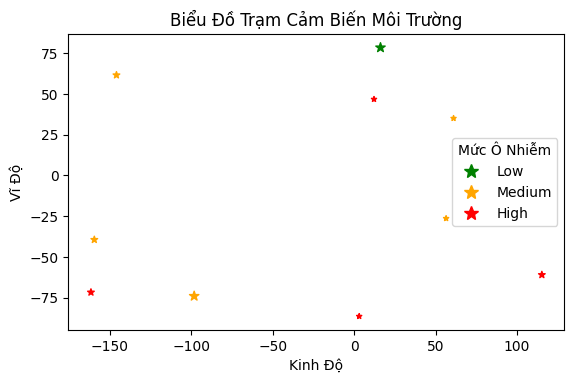

In [64]:
import geopandas as gpd 
import pandas as pd 
import matplotlib.pyplot as plt 
from faker import Faker 
import random 

# Tạo dữ liệu giả định về các trạm cảm biến môi trường 
fake = Faker() 
data = { 
    'Station_ID': range(10), 
    'Latitude': [fake.latitude() for _ in range(10)], 
    'Longitude': [fake.longitude() for _ in range(10)], 
    'Air Pollution': [random.choice(['Low', 'Medium', 'High']) for _ in range(10)], 
    'Importance_Level': [random.choice(['Low', 'Medium', 'High']) for _ in range(10)] 
} 
df = pd.DataFrame(data) 

# Tạo GeoDataFrame từ DataFrame 
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Biểu diễn các trạm cảm biến trên bản đồ 
# Chia các trạm cảm biến thành 3 nhóm dựa trên mức độ ô nhiễm không khí
air_pollution_colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
marker_size = gdf['Importance_Level'].map({'Low': 15, 'Medium': 25, 'High': 50})

gdf.plot(ax=plt.gca(), marker='*', color=gdf['Air Pollution'].map(air_pollution_colors), markersize=marker_size)

# Tùy chỉnh biểu đồ 
plt.title('Biểu Đồ Trạm Cảm Biến Môi Trường') 
plt.xlabel('Kinh Độ') 
plt.ylabel('Vĩ Độ') 

# Add legend
handles = [plt.Line2D([], [], marker='*', color=color, linestyle='None', markersize=10) for color in air_pollution_colors.values()]
labels = air_pollution_colors.keys()
plt.legend(handles, labels, title='Mức Ô Nhiễm', loc='best')

# Hiển thị biểu đồ 
plt.show()


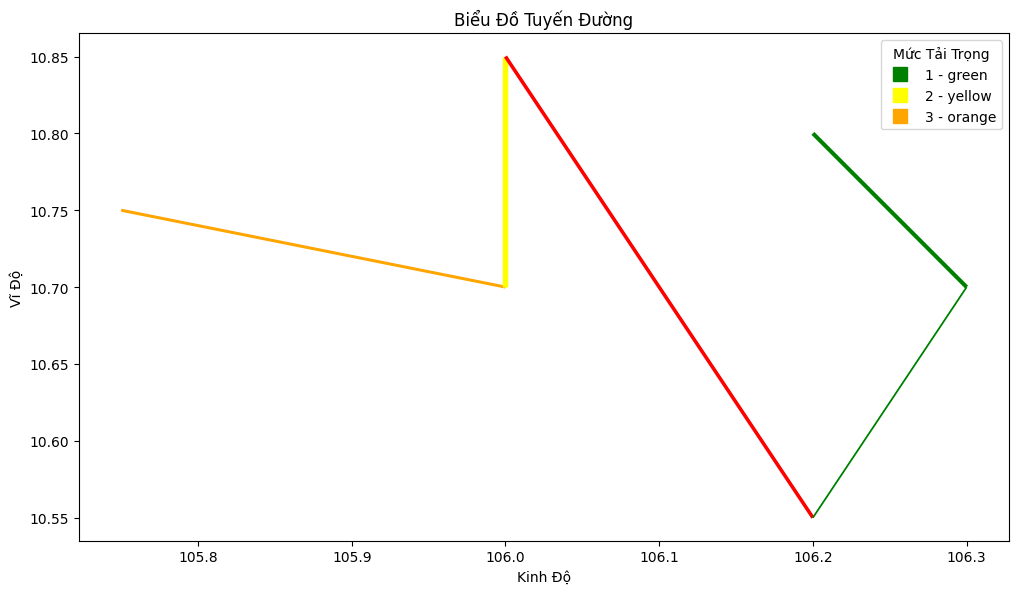

In [147]:
import geopandas as gpd 
import pandas as pd 
import matplotlib.pyplot as plt 
from faker import Faker 
import random 
from shapely.geometry import LineString

# Tạo dữ liệu giả định về mạng lưới đường
fake = Faker()
data = {
    'Road_ID': range(5),
    'Type': [fake.word() for _ in range(5)],
    'Thickness': [random.uniform(1, 5) for _ in range(5)],
    'Complexity': [random.uniform(1, 5) for _ in range(5)],
    'geometry': [LineString([(105.75, 10.75), (106.0, 10.7)]),
                LineString([(106.0, 10.7), (106.0, 10.85)]),
                LineString([(106.0, 10.85), (106.2, 10.55)]),
                LineString([(106.2, 10.55), (106.3, 10.7)]),
                LineString([(106.3, 10.7), (106.2, 10.8)])]
}

# Tạo GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry='geometry')

# Ánh xạ màu cho khả năng tải trọng
load_capacity_colors = {1: 'green', 2: 'yellow', 3: 'orange'}

# Vẽ các đường dựa trên màu sắc tải trọng và độ dày dựa trên độ phức tạp
fig, ax = plt.subplots(figsize=(12, 10))
for index, row in gdf.iterrows():
    thickness = int(row['Thickness'])
    color = load_capacity_colors.get(thickness, 'red')  # Màu mặc định là 'red' nếu không có trong load_capacity_colors
    linewidth = row['Complexity']
    gpd.GeoSeries(row['geometry']).plot(ax=ax, color=color, linewidth=linewidth)


# Tuỳ chỉnh biểu đồ
plt.title('Biểu Đồ Tuyến Đường')
plt.xlabel("Kinh Độ")
plt.ylabel("Vĩ Độ")

# Tạo chú thích cho màu sắc tải trọng
handles = [plt.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10) for color in load_capacity_colors.values()]
labels = [f'{load} - {color}' for load, color in load_capacity_colors.items()]
plt.legend(handles, labels, title='Mức Tải Trọng', loc='best')

# Hiển thị biểu đồ
plt.show()


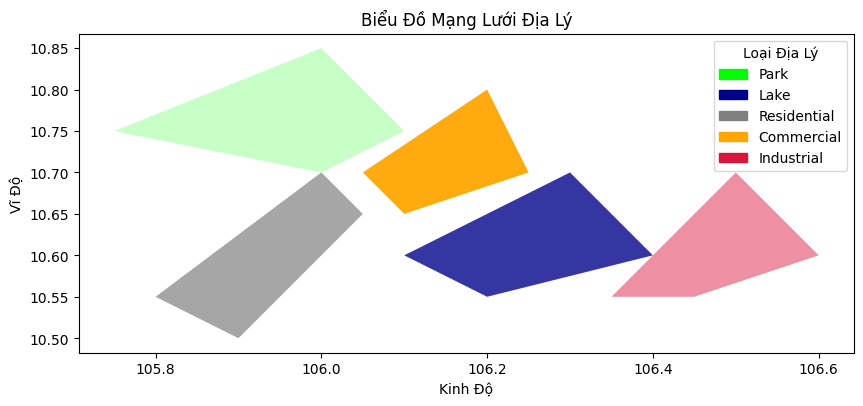

In [150]:
import geopandas as gpd 
import pandas as pd 
import matplotlib.pyplot as plt 
from shapely.geometry import Polygon
import random

# Tạo dữ liệu giả định về các khu vực địa lý
data = {
    'Area_ID': range(5),
    'Type': ['Park', 'Lake', 'Residential', 'Commercial', 'Industrial'],
    'Importance': [random.uniform(1, 5) for _ in range(5)],
    'geometry': [Polygon([(105.75, 10.75), (106.0, 10.7), (106.1, 10.75), (106.0, 10.85)]),  # Park
                 Polygon([(106.1, 10.6), (106.2, 10.55), (106.4, 10.6), (106.3, 10.7)]),        # Lake
                 Polygon([(105.8, 10.55), (106.0, 10.7), (106.05, 10.65), (105.9, 10.5)]),      # Residential
                 Polygon([(106.05, 10.7), (106.2, 10.8), (106.25, 10.7), (106.1, 10.65)]),     # Commercial
                 Polygon([(106.45, 10.55), (106.6, 10.6), (106.5, 10.7), (106.35, 10.55)])]    # Industrial
}

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Tạo GeoDataFrame từ DataFrame 
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Định nghĩa màu sắc dựa trên loại địa lý
type_colors = {'Park': 'lime', 'Lake': 'darkblue', 'Residential': 'grey', 'Commercial': 'orange', 'Industrial': 'crimson'}

# Biểu diễn các khu vực địa lý trên bản đồ với màu sắc và độ đậm tương ứng
fig, ax = plt.subplots(figsize=(10, 8))
for idx, row in gdf.iterrows():
    type_color = type_colors.get(row['Type'], 'gray')  # Màu mặc định là gray nếu không có trong type_colors
    importance = row['Importance']
    gdf.iloc[[idx]].plot(ax=ax, color=type_color, alpha=importance/5)

# Tạo chú thích (legend) cho biểu đồ
handles = [plt.Rectangle((0,0),1,1, color=color) for color in type_colors.values()]
labels = type_colors.keys()
plt.legend(handles, labels, title='Loại Địa Lý')

# Tùy chỉnh biểu đồ 
plt.title('Biểu Đồ Mạng Lưới Địa Lý')
plt.xlabel('Kinh Độ') 
plt.ylabel('Vĩ Độ') 

# Hiển thị biểu đồ 
plt.show()
